# Fully Connected Neural Networks 

This tutorial demonstrates the usage of fully connected neural-networks to classify 2-dimensional synthetic data. We implement the network using Keras and TensorFlow. Keras and TensorFlow are powerful frameworks that allow you to build many  deep-learning-based applications.

The goals of this tutorial are:
  - Introduce Keras and TensorFlow to implement fully connected neural network.
  - Illustrate the non-linear decision rules that multi-layer neural networks can achieve.
  
      
## Importing Python Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! ls gdrive/MyDrive/ENEL645-tutorial/ENEL645-master/

Figures     LICENSE  OUTLINE.txt  README.md
JNotebooks  Modules  PDFs	  Short-tutorials


In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = 'D:/code/ENEL645/Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils

## Loading and Displaying a Synthetic 2D Dataset

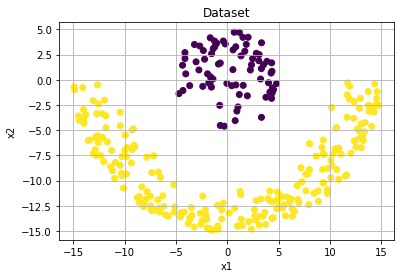

In [34]:
#Generating a synthetic dataset with four classes
nsamples = 300

#data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

## Train, Validation and Test Sets Split

In [35]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

C:\Users\TAHSIN~1\AppData\Local\Temp/ipykernel_3820/2020166094.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_split = np.int(0.5*Y.size)
C:\Users\TAHSIN~1\AppData\Local\Temp/ipykernel_3820/2020166094.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

## Data Normalization

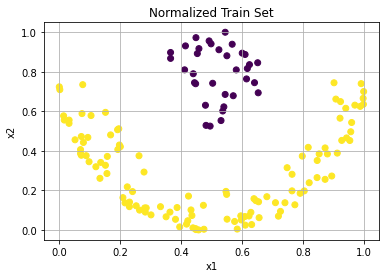

In [36]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

## Representing Labels using one-hot-ecoding

In [37]:
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 0 0 0 1]

Y_oh_train[:5]=
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


## Defining a Fully Connected Neural Network with Keras

In [38]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    l1 = Dense(10, activation='relu')(inputs)
    out1 = Dense(k, activation='softmax')(l1)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"]) 
    return model

In [39]:
model = my_model(k)
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


## Training the Model

In [40]:
batch_size = train_split
nb_epoch = 300
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.7566 - accuracy: 0.3400 - val_loss: 0.7133 - val_accuracy: 0.2533
Epoch 2/300
1/1 [==============================] - 0s 54ms/step - loss: 0.7083 - accuracy: 0.3067 - val_loss: 0.6802 - val_accuracy: 0.6533
Epoch 3/300
1/1 [==============================] - 0s 54ms/step - loss: 0.6714 - accuracy: 0.6600 - val_loss: 0.6516 - val_accuracy: 0.7333
Epoch 4/300
1/1 [==============================] - 0s 52ms/step - loss: 0.6398 - accuracy: 0.7733 - val_loss: 0.6257 - val_accuracy: 0.7333
Epoch 5/300
1/1 [==============================] - 0s 57ms/step - loss: 0.6117 - accuracy: 0.7733 - val_loss: 0.6016 - val_accuracy: 0.7333
Epoch 6/300
1/1 [==============================] - 0s 57ms/step - loss: 0.5856 - accuracy: 0.7733 - val_loss: 0.5824 - val_accuracy: 0.7333
Epoch 7/300
1/1 [==============================] - 0s 65ms/step - loss: 0.5639 - accuracy: 0.7733 - val_loss: 0.5703 - val_accuracy: 0.7333
Epoch 8/300
1/1 [=====

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [0.6548303961753845, 0.6933333277702332]

Layer 0
Bias:
 [ 0.00277656  0.06191137 -0.00335858  0.0026257  -0.01969511  0.02254842
  0.00111907  0.05567598  0.02098799 -0.00161067]
W:
 [[-0.260971    0.24541059 -0.3940583  -0.04876634  0.653247    0.58744293
  -0.33493227 -0.08659866  0.2948418   0.68126136]
 [ 0.23719485 -0.01889566  0.30148733  0.08827184 -0.15446164 -0.69142985
   0.59237176  0.30258435  0.01772462  0.27130702]]

Layer 1
Bias:
 [-0.08926477  0.08926477]
W:
 [[ 0.70419246  0.27446848]
 [-0.6290792   0.11506526]
 [-0.4530898   0.22640891]
 [ 0.01426659  0.14597298]
 [ 0.08378379 -0.20366514]
 [-0.03558112  0.22257926]
 [-0.36995    -0.30488124]
 [-0.2596664   0.6316235 ]
 [-0.33952168 -0.0867713 ]
 [-0.54571897 -0.5241167 ]]



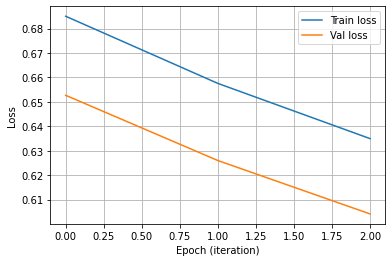

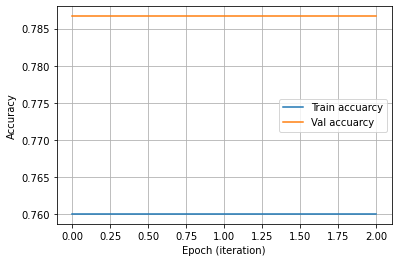

In [ ]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

## Classifier Decision Boundary

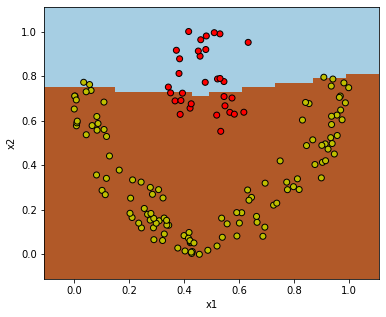

In [ ]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Suggested activities
- Repeat the example without normalizing the data or using standardization (i.e., subtract from the mean and divide by the standard-deviation);
- Experiment with other datasets
- Change the neural network architecture
- ...